In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import PCA
import os

## Options

In [121]:
def plot_correlation_heatmap(data: pd.DataFrame, columns: list):
    """
    Plot correlation heatmap of specific columns
    """
    correlation_matrix = data[columns].corr()
    plt.figure(figsize=(13, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidth=0.5)
    plt.title("Correlation Heatmap for selected attributes")
    plt.show()

def plot_distributions(data: pd.DataFrame):
    """
    Plot distributions of numeric data
    """
    sns.set_style("whitegrid", {"grid_linestyle": "--"})
    columns = data.columns
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / 2)
    num_columns = 2

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 12))
    axes = axes.ravel()
    for i, column in enumerate(columns):
        sns.histplot(data[column], ax=axes[i], kde=True)
        axes[i].set_title(f"Distribution of {column}")
        axes[i].set_xlabel(column)
        axes[i].grid(axis="y", linestyle="--", alpha=0.6)
        plt.xlim(xmin=0)

    if num_plots % 2 != 0:
        axes.flat[-1].set_visible(False)
   
    plt.tight_layout()
    plt.show()

def plot_individual_distributions(data: pd.DataFrame):
    """
    Plot individual distributions of numeric data
    """
    sns.set_style("whitegrid", {"grid_linestyle": "--"})
    columns = data.columns

    for column in columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data[column], kde=True)
        # plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.grid(axis="y", linestyle="--", alpha=0.6)
        plt.xlim(xmin=0)
        plt.tight_layout()

        output_dir = "figures"
        output_filename = os.path.join(output_dir, f"{column}_distribution.png")
        plt.savefig(output_filename)
        plt.close()

def plot_violin(data: pd.DataFrame, column: str):
    """
    Plot violin 
    """    
    plt.figure(figsize=(6, 6))
    sns.violinplot(y=column, data=data, orient="v")
    # plt.title(f"Violin Plot of {column}")
    plt.show()

# - PCA Analysis

def plot_PCA_variance(numbers: list, ratios: list):
    """
    Plot variance ratio
    """
    plt.grid(True)
    plt.plot(numbers, ratios, marker="o")
    plt.xlabel("n_components")
    plt.ylabel("Explained Variance Ratio")
    # plt.title("n_components vs. Explained Variance Ratio")
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.figure(figsize=(4, 4))
    plt.show()


def plot_PCA_directions(data_numeric, numbers):
    """
    Plot directions
    """
    # Assumption: data is already normalized 
    n_plots = len(numbers)
    n_cols = min(n_plots, 2)
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig_width = 4 * n_cols 
    fig_height = 4 * n_rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    fig.subplots_adjust(hspace=0.7)

    if n_plots == 1:
        axes = np.array([axes])
    
    component_colors = plt.cm.viridis(np.linspace(0, 1, max(numbers) + 1))

    for i, number in enumerate(numbers):
        row = i // n_cols
        col = i % n_cols

        pca = PCA(n_components=number)
        pca.fit_transform(data_numeric)
        principal_direction = pca.components_

        if n_rows > 1:
            ax = axes[row, col]
        else:
            ax = axes[col]

        # ax.set_title(f"Principal Directions for {number} Components")
        for j, direction in enumerate(principal_direction):
            color = component_colors[j]
            ax.quiver(0, 0, direction[0], direction[1], angles="xy", scale_units="xy", scale=1.0, color=color, label=f"Component {j + 1}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")

        ax.grid(linestyle="--", linewidth=0.5, alpha=0.6, color="gray")

    common_legend = fig.legend(handles=[plt.Line2D([0], [0], color=component_colors[i], label=f"Component {i + 1}") for i in range(max(numbers) + 1)], title="Components", loc="upper right", bbox_to_anchor=(1.2, 1))
    for handle in common_legend.legendHandles:
        handle.set_visible(True)

    for i in range(n_plots, n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    # plt.suptitle("PCA Components Directions", fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_individual_violin_plots(data: pd.DataFrame):
    """
    Plot individual violin plots of numeric data
    """
    sns.set_style("whitegrid", {"grid_linestyle": "--"})
    columns = data.columns

    for column in columns:
        plt.figure(figsize=(6, 6))
        sns.violinplot(y=column, data=data, orient="v", color="skyblue")
        # plt.title(f"Violin Plot of {column}")
        plt.xlabel(column)
        plt.grid(axis="y", linestyle="--", alpha=0.6)
        plt.tight_layout()

        output_dir = "figures"
        output_filename = os.path.join(output_dir, f"{column}_violin.png")
        plt.savefig(output_filename)
        plt.close()

In [122]:
# == Options ==
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [123]:
# == Reading the dataset ==
dataset_path = "./data/SAheart.csv"
data = pd.read_csv(dataset_path)

In [124]:
# == Rename selected columns (if needed) ==
columns = []
# Replace _ if existing
data = data.rename(columns={column: column.replace("_%", "") for column in columns})

In [125]:
# == Select numeric columns ==
# (all columns are numeric except from famhist)
# data_numeric = data.select_dtypes(exclude="object")
# data_numeric.info(verbose=True, show_counts=True)
data['famhist'] = data['famhist'].map({'Absent': 0, 'Present': 1})
data_numeric = data
summary_statistics = data_numeric.describe().apply(lambda s: s.apply(lambda x: format(x, "g"))).transpose()
latex_table = summary_statistics.to_latex()

In [126]:
# == Remove id(row.names) column ==
data_chd = data["chd"]

if "id" in data:
  data.drop("id", inplace=True, axis=1)

# Drop this column as welll before the analysis
if "adiposity" in data:
  data.drop("adiposity", inplace=True, axis=1)

if "chd" in data:
  data.drop("chd", inplace=True, axis=1)

# # Remove famhist
# if "famhist" in data:
#   data.drop("famhist", inplace=True, axis=1)

# Normalize to 0-1
data["typea"] = (data["typea"] - data["typea"].min()) / (data["typea"].max() - data["typea"].min())


In [127]:
# == Print none values ==
data.isna().sum()

sbp        0
tobacco    0
ldl        0
famhist    0
typea      0
obesity    0
alcohol    0
age        0
dtype: int64

In [128]:
# == Display the first rows ==
data.head()

,sbp,tobacco,ldl,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,1,0.553846,25.30,97.20,52
1,144,0.01,4.41,0,0.646154,28.87,2.06,63
2,118,0.08,3.48,1,0.600000,29.14,3.81,46
3,170,7.50,6.41,1,0.584615,31.99,24.26,58
4,134,13.60,3.50,1,0.723077,25.99,57.34,49


## PCA Analysis

In [129]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [130]:
# PCA Analysis Guide (looks helpful)
# https://www.youtube.com/watch?v=oiusrJ0btwA
# https://github.com/dataprofessor/code/blob/master/python/PCA_analysis.ipynb

In [131]:
# == Remove outliers before PCA Analysis ==
# It may not be necessary
# z_scores = (data_numeric - data_numeric.mean()) / data_numeric.std()

# filtered_records = (z_scores.abs() < 3).all(axis=1)

# # Filter the DataFrame to keep only those rows
# data_numeric = data_numeric[filtered_records] 
# # Remove data points with |Z-score| > 3
# # 406 of 460 records
# data_numeric.shape[0]

In [132]:
data_numeric.head()

,sbp,tobacco,ldl,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,1,0.553846,25.30,97.20,52
1,144,0.01,4.41,0,0.646154,28.87,2.06,63
2,118,0.08,3.48,1,0.600000,29.14,3.81,46
3,170,7.50,6.41,1,0.584615,31.99,24.26,58
4,134,13.60,3.50,1,0.723077,25.99,57.34,49


In [133]:
# == Normalize before PCA ==

scaler = StandardScaler()
# Trying out a different scaler
# scaler = MinMaxScaler() 


data_normalized = scaler.fit_transform(data_numeric)
data_numeric = pd.DataFrame(data_normalized, columns=data_numeric.columns)

# apply skewing after scaling, or before? 
# it doesn't make any difference
# apply the skewness
data_numeric["tobacco"] = np.where(data_numeric["tobacco"] > 0, np.log(data_numeric["tobacco"]), data_numeric["tobacco"])
data_numeric["alcohol"] = np.where(data_numeric["alcohol"] > 0, np.log(data_numeric["alcohol"]), data_numeric["alcohol"])

data_numeric.head()


c:\Users\mirto\miniconda3\envs\mldm\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,sbp,tobacco,ldl,famhist,typea,obesity,alcohol,age
0,1.058564,0.600523,0.478412,1.185854,-0.418470,-0.176786,1.187154,0.629336
1,0.277089,-0.790237,-0.159680,-0.843274,0.193344,0.671373,-0.612745,1.383115
2,-0.992806,-0.774980,-0.609245,1.185854,-0.112563,0.735519,-0.541183,0.218184
3,1.546985,-0.171662,0.807126,1.185854,-0.214532,1.412621,-1.220570,1.040488
4,-0.211332,0.775559,-0.599577,1.185854,0.703189,-0.012856,0.499426,0.423760


Number of components	1	Total variance	0.27987416762575323
Number of components	2	Total variance	0.4350875315115985
Number of components	3	Total variance	0.5663573908932868
Number of components	4	Total variance	0.6833619528885632
Number of components	5	Total variance	0.778226236347826
Number of components	6	Total variance	0.8619680739307424
Number of components	7	Total variance	0.9367955214592958
Number of components	8	Total variance	1.0


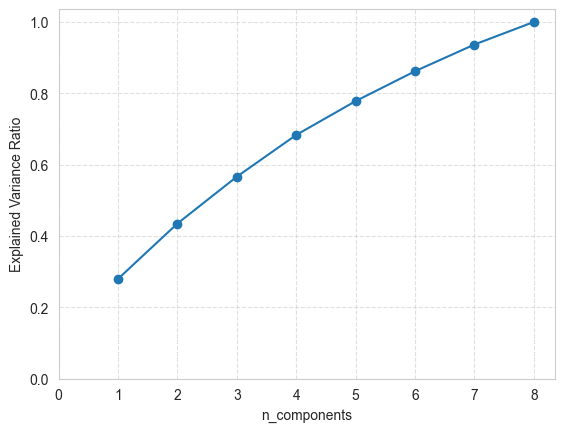

<Figure size 400x400 with 0 Axes>

In [134]:
# == Number of PCA's and variance captured ==
# The number of components is experimental at this stage
# Choosing the correct number of principal components is crucial
numbers = [1, 2, 3, 4, 5, 6, 7, 8]
variance_ratios = []
# Trying out the different numbers
for number in numbers:
  pca_ = PCA(n_components=number)
  pca_.fit_transform(data_numeric)
  variance_ratios.append(np.sum(pca_.explained_variance_ratio_))
  print(f"Number of components\t{number}\tTotal variance\t{sum(pca_.explained_variance_ratio_)}")

plot_PCA_variance(numbers=numbers, ratios=variance_ratios)
# see major and minor grid

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


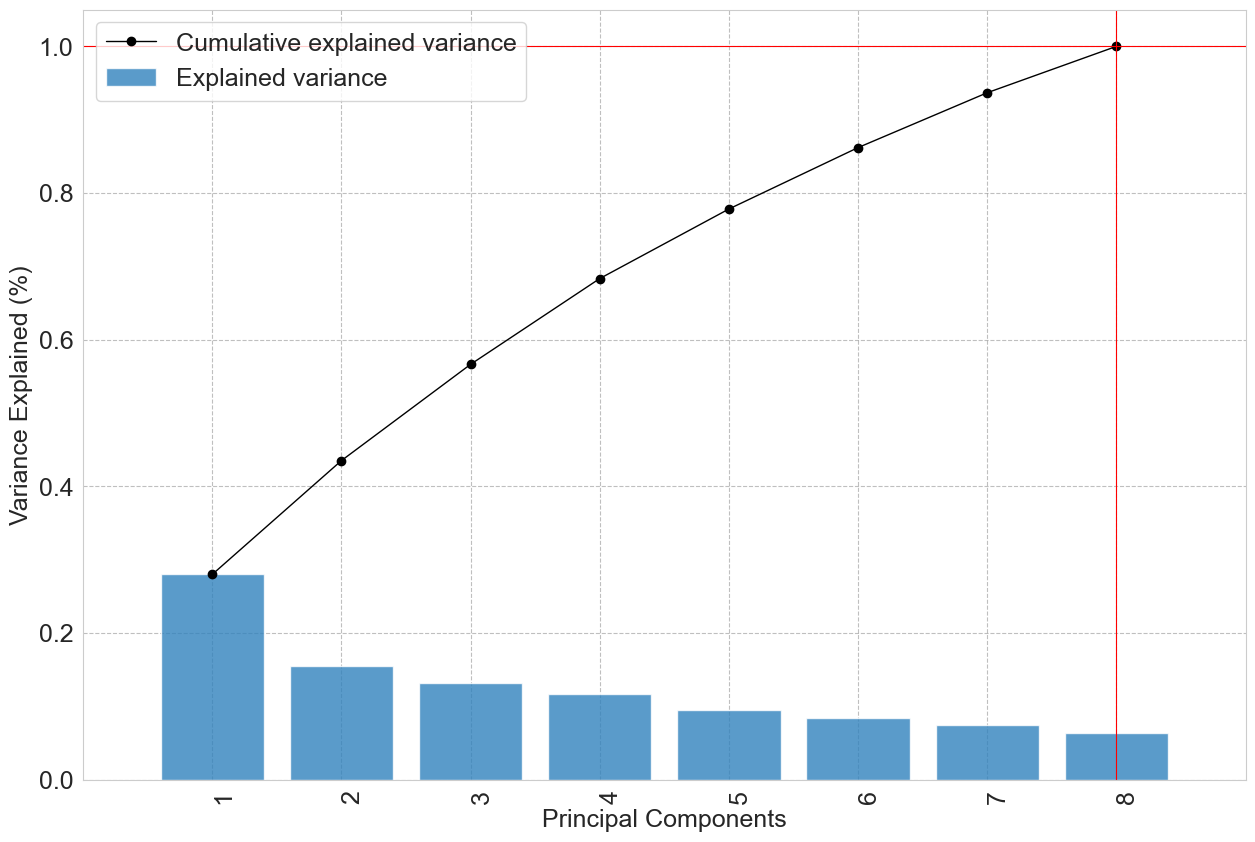

In [135]:
# == PCA variance captured ==
model = pca.pca()
out = model.fit_transform(data_numeric)

fig, ax = model.plot()
plt.grid(linestyle="--", alpha=0.5, color="gray") 
plt.ylim(ymin=0)
ax.set_title("")

ax.set_xlabel('Principal Components', fontsize=18)  # Set this if you have a specific label
ax.set_ylabel('Variance Explained (%)', fontsize=18)  # Set this if you have a specific label
ax.tick_params(axis='both', which='major', labelsize=18)  # Increase tick label size

# If your plot includes a legend and you want to increase the legend text size
ax.legend(fontsize=18)

plt.savefig("figures/variance.png")
plt.show()

In [136]:
# == PCA directions ==
# plot_PCA_directions(data_numeric=data_numeric, numbers=numbers)

In [137]:
# == PCA variance ratios ==
explained_variance_ratios = pca_.explained_variance_ratio_
most_informative_pca = explained_variance_ratios.argmax()

# Print explained variance ratios for all PCs
for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    print(f"PC_{i + 1}: {explained_variance_ratio:.4f}")

print(f"The most informative PCA is PCA_{most_informative_pca + 1} with an explained variance ratio of {explained_variance_ratios[most_informative_pca]:.4f}")

PC_1: 0.2799
PC_2: 0.1552
PC_3: 0.1313
PC_4: 0.1170
PC_5: 0.0949
PC_6: 0.0837
PC_7: 0.0748
PC_8: 0.0632
The most informative PCA is PCA_1 with an explained variance ratio of 0.2799


In [138]:
# == Interpret PCA_1 and direction ==
factor_loadings_pc1 = pca_.components_[0]
feature_names = data_numeric.columns
feature_loadings = dict(zip(feature_names, factor_loadings_pc1))
sorted_features = sorted(feature_loadings.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the features with the highest absolute factor loadings for PC1
print("Features contributing most to PC1:")
for feature, loading in sorted_features:
    print(f"{feature}: {loading:.4f}")

Features contributing most to PC1:
age: -0.5426
obesity: -0.4574
ldl: -0.4484
sbp: -0.4370
famhist: -0.3007
tobacco: -0.1027
alcohol: -0.0557
typea: 0.0162


c:\Users\mirto\miniconda3\envs\mldm\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\mirto\miniconda3\envs\mldm\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\mirto\miniconda3\envs\mldm\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\mirto\miniconda3\envs\mldm\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\mirto\miniconda3\envs\mldm\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\mirto\miniconda3\envs\mldm\Lib\site-packages\s

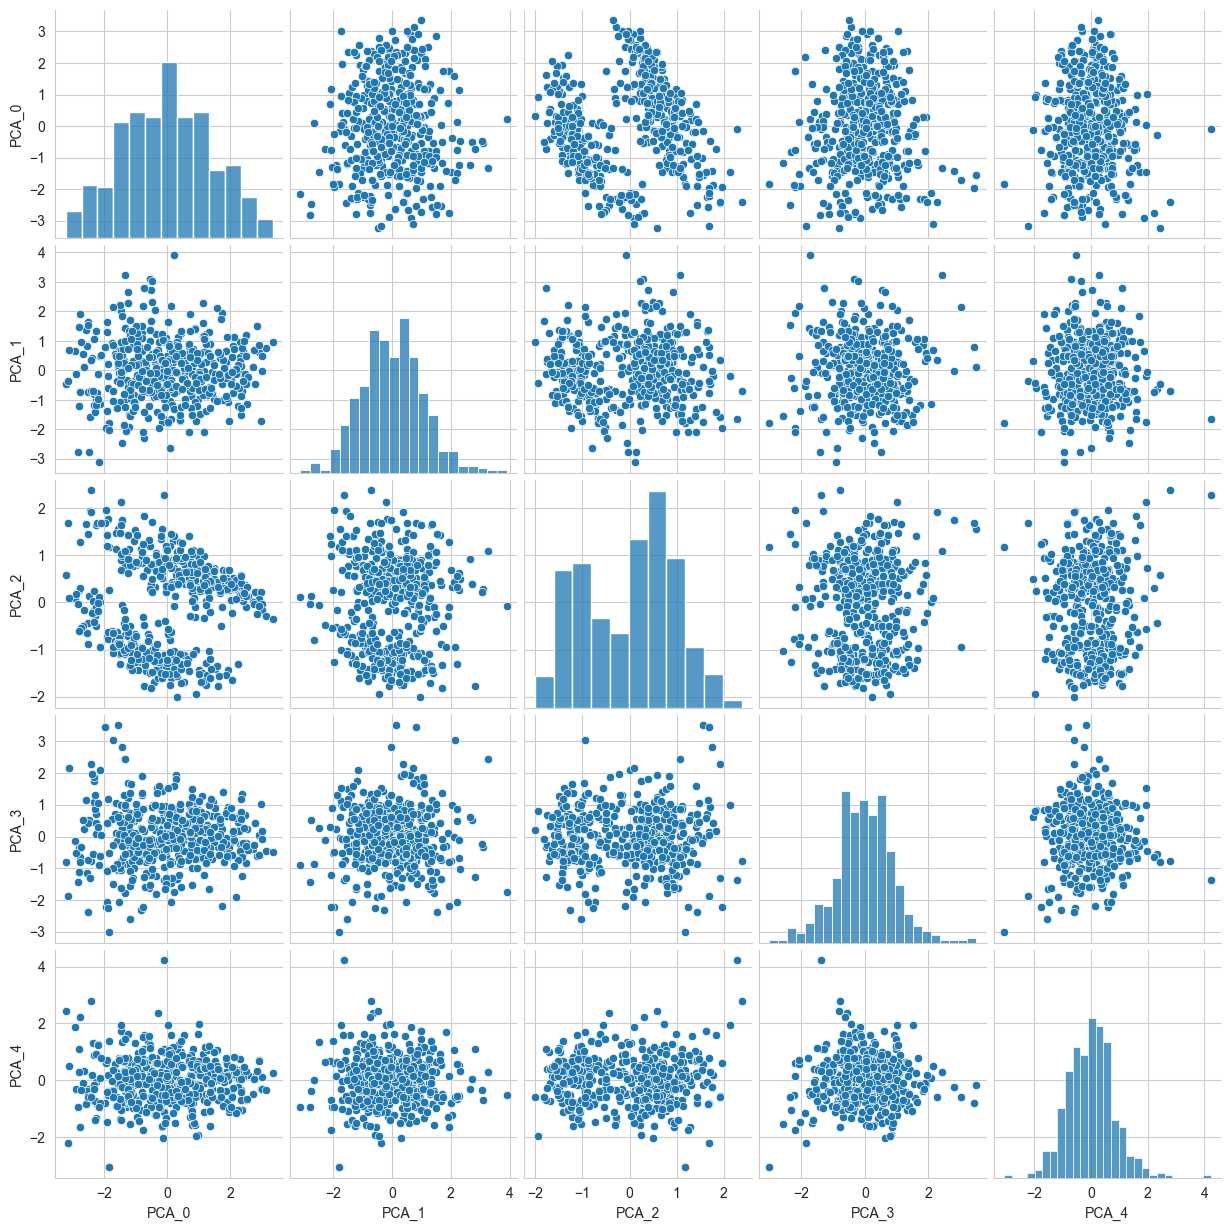

In [139]:
# == Pairplotting PCAs ==
# == Try out 3, 4, 5 PCAs ==
number = 5
pca_ = PCA(n_components=number)
pca_.fit(data_numeric)
data_pca = pca_.transform(data_numeric)
data_pca = pd.DataFrame(data_pca, columns=["PCA_" + str(i) for i in range(number)])

# This is a useless plot for the time being
number = len(data_pca)
targets = list(range(number))
colors = plt.cm.viridis(np.linspace(0, 1, number))

sns.set_style("whitegrid")
sns.pairplot(data_pca, palette="viridis")
plt.savefig("figures/pairplot.png")
plt.show()


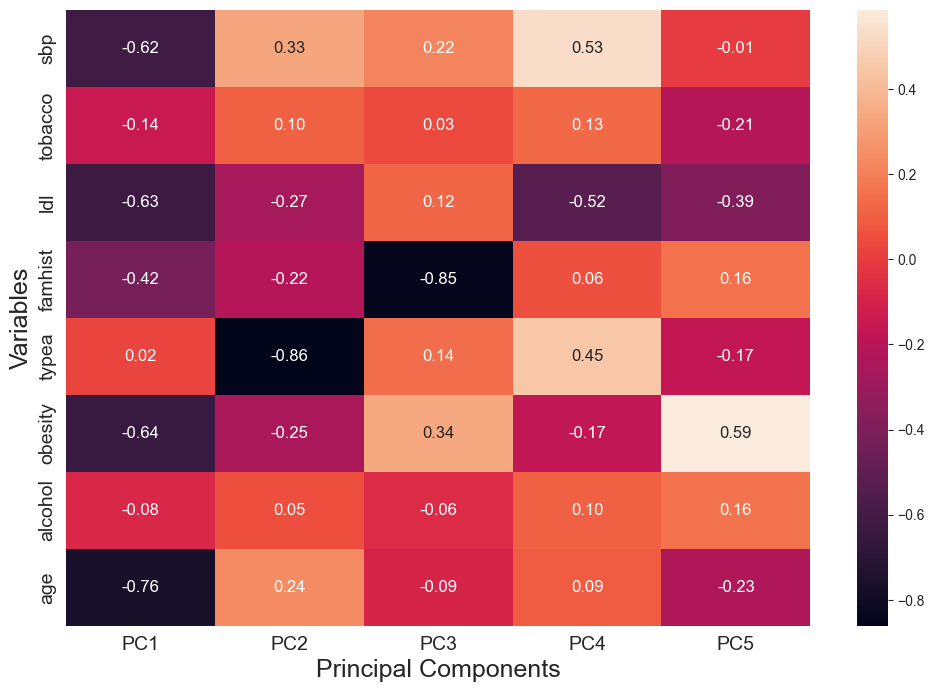

In [140]:
# Assuming pca_ is defined and fitted
plt.figure(figsize=(12, 8))

# Calculate factor loadings
factor_loadings = pca_.components_.T * np.sqrt(pca_.explained_variance_)

feature_names = data_numeric.columns    
# Create heatmap and increase font sizes
ax = sns.heatmap(factor_loadings, cmap='rocket', annot=True, fmt='.2f', annot_kws={"size": 12}, xticklabels=[f"PC{i+1}" for i in range(pca_.n_components_)], yticklabels=feature_names)

plt.xlabel("Principal Components", fontsize=18)  # Increase font size for x-axis label
plt.ylabel("Variables", fontsize=18)            # Increase font size for y-axis label
  
plt.xticks(fontsize=14)  # Increase font size for x-axis ticks
plt.yticks(fontsize=14)  # Increase font size for y-axis ticks

plt.savefig("figures/factor_loadings.png")
plt.show()

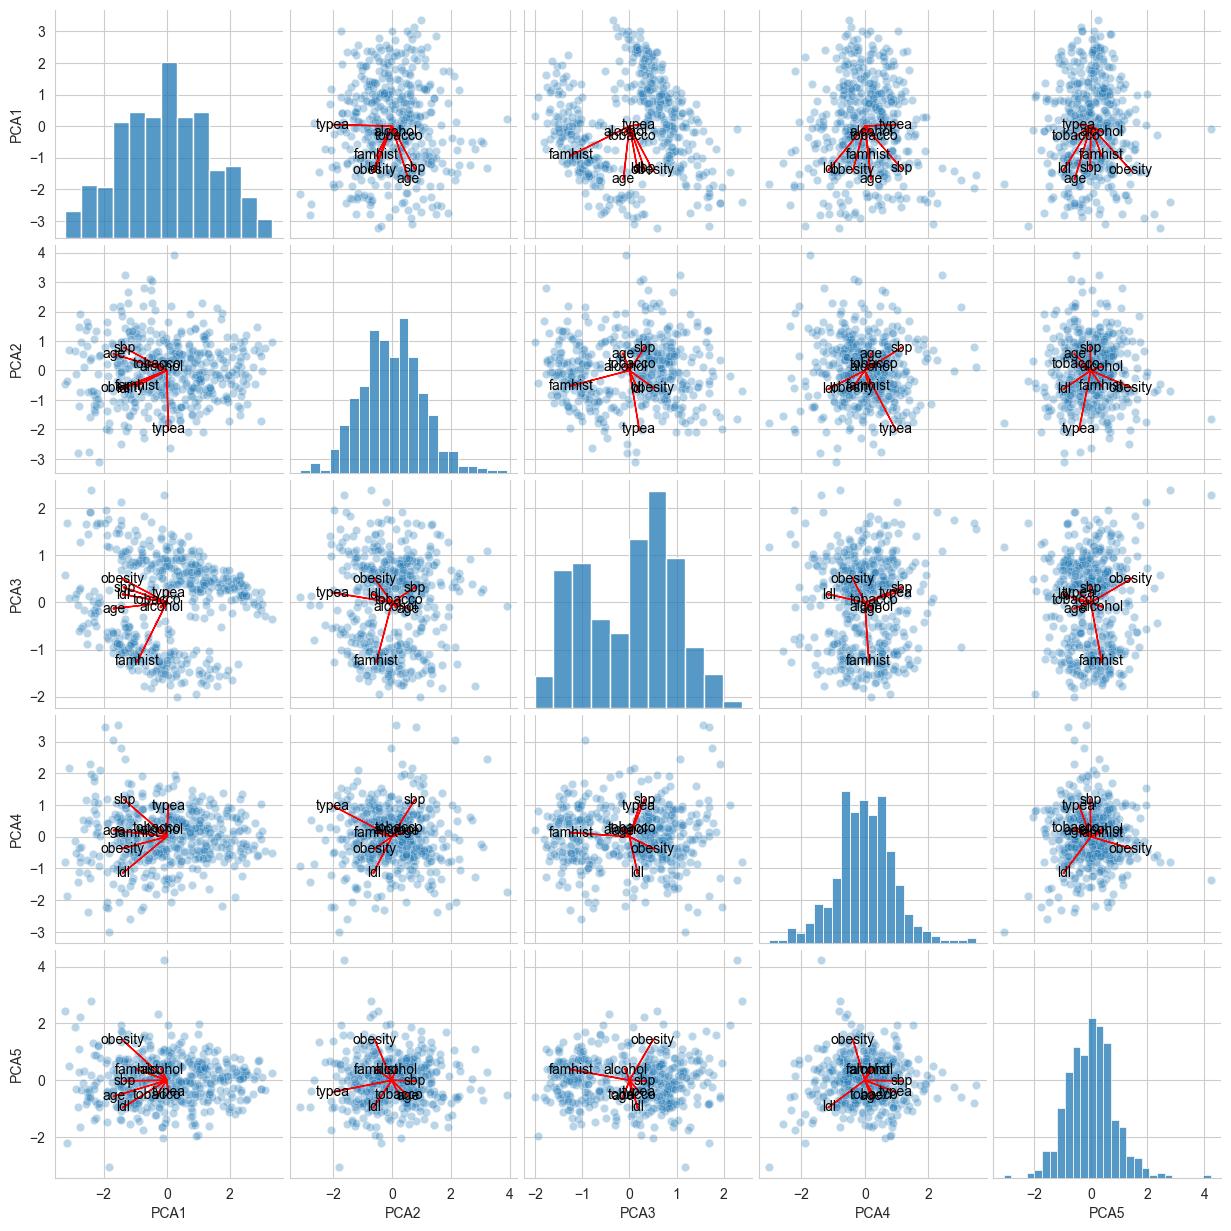

In [141]:
pca = PCA(n_components=5)  # Ensure 5 components
data_pca = pca.fit_transform(data_numeric)
# loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# Function to scale the arrows
def scale_arrow(loading, ax_limits):
    # Scale the arrows by the range of the axes
    return 1.5 * loading * np.abs(ax_limits[1] - ax_limits[0]) / 5

# Create pairplot with transparent points
pairplot_fig = sns.pairplot(data_pca_df, plot_kws={'alpha': 0.3})

# Iterate over each subplot and add arrows, except for the diagonal
for i in range(loadings.shape[1]):
    for j in range(loadings.shape[1]):
        if i != j:  # This condition skips the diagonal histograms
            ax = pairplot_fig.axes[i][j]
            ax_limits_x = ax.get_xlim()
            ax_limits_y = ax.get_ylim()

            # Scaling the arrows so they fit into the subplot
            for k in range(loadings.shape[0]):
                dx = scale_arrow(loadings[k, j], ax_limits_x)
                dy = scale_arrow(loadings[k, i], ax_limits_y)

                ax.arrow(0, 0, dx, dy, color='red', alpha=1.0, width=0.005, head_width=0.05, head_length=0.05)
                ax.text(dx, dy, data_numeric.columns[k], color='black', ha='center', va='center')

plt.savefig("figures/directions.png")
plt.show()


In [142]:
# # == Plotting projected columns to components ==
# pca = PCA(n_components=3)
# principalComponents = pca.fit_transform(data_numeric)

# PCAs = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# # Set up a 2x4 subplot (we have 7 attributes)
# fig, axs = plt.subplots(2, 4, subplot_kw={'projection': '3d'}, figsize=(20, 10))

# axs = axs.flatten()

# for i, attribute in enumerate(data_numeric.columns):
#     ax = axs[i]
    
#     attr_norm = (data_numeric[attribute] - data_numeric[attribute].min()) / (data_numeric[attribute].max() - data_numeric[attribute].min())
    
#     img = ax.scatter(PCAs['PC1'], PCAs['PC2'], PCAs['PC3'], c=attr_norm, cmap='viridis')
#     fig.colorbar(img, ax=ax, label=attribute, shrink=0.5, aspect=10)
    
#     ax.set_xlabel('PC1')
#     ax.set_ylabel('PC2')
#     ax.set_zlabel('PC3')
#     ax.set_title(f'{attribute}')

# if len(data_numeric.columns) < 8:
#     axs[-1].set_visible(False)  # This hides the last subplot


# plt.tight_layout()
# plt.show()

In [143]:
# pca = PCA(n_components=3)
# principalComponents = pca.fit_transform(data_numeric)

# PCAs = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# fig, axs = plt.subplots(2, 4, subplot_kw={'projection': '3d'}, figsize=(20, 10))

# axs = axs.flatten()

# # Arrow scale
# arrow_scale = 4.0  # Adjust this value as needed

# for i, attribute in enumerate(data_numeric.columns):
#     ax = axs[i]
    
#     # Normalize the attribute for coloring
#     attr_norm = (data_numeric[attribute] - data_numeric[attribute].min()) / (data_numeric[attribute].max() - data_numeric[attribute].min())
    
#     # Create a scatter plot
#     img = ax.scatter(PCAs['PC1'], PCAs['PC2'], PCAs['PC3'], c=attr_norm, cmap='cividis')
#     fig.colorbar(img, ax=ax, label=attribute, shrink=0.5, aspect=10)
    
#     # Set labels and title
#     ax.set_xlabel('PC1')
#     ax.set_ylabel('PC2')
#     ax.set_zlabel('PC3')
#     ax.set_title(f'{attribute}')

#     # Set the aspect of the plot to be equal
#     ax.set_box_aspect([1,1,1])

#     # Set plot limits
#     plot_range = np.array([PCAs['PC1'].max() - PCAs['PC1'].min(), 
#                            PCAs['PC2'].max() - PCAs['PC2'].min(), 
#                            PCAs['PC3'].max() - PCAs['PC3'].min()]).max() / 2.0
#     mid_x = (PCAs['PC1'].max() + PCAs['PC1'].min()) * 0.5
#     mid_y = (PCAs['PC2'].max() + PCAs['PC2'].min()) * 0.5
#     mid_z = (PCAs['PC3'].max() + PCAs['PC3'].min()) * 0.5
    
#     ax.set_xlim(mid_x - plot_range, mid_x + plot_range)
#     ax.set_ylim(mid_y - plot_range, mid_y + plot_range)
#     ax.set_zlim(mid_z - plot_range, mid_z + plot_range)

#     # Calculate the mean of the data for the origin of arrows
#     mean_of_data = np.mean(principalComponents, axis=0)

#     # Draw arrows
#     for j in range(3):  # Assuming there are 3 principal components
#         vector = pca.components_[j] * arrow_scale  # Use a fixed scaling factor
#         ax.quiver(mean_of_data[0], mean_of_data[1], mean_of_data[2], 
#                   vector[0], vector[1], vector[2], color=["r", "g", "b"][j], alpha=1.0, lw=2)

# if len(data_numeric.columns) < 8:
#     axs[-1].set_visible(False)

# plt.tight_layout()
# plt.show()

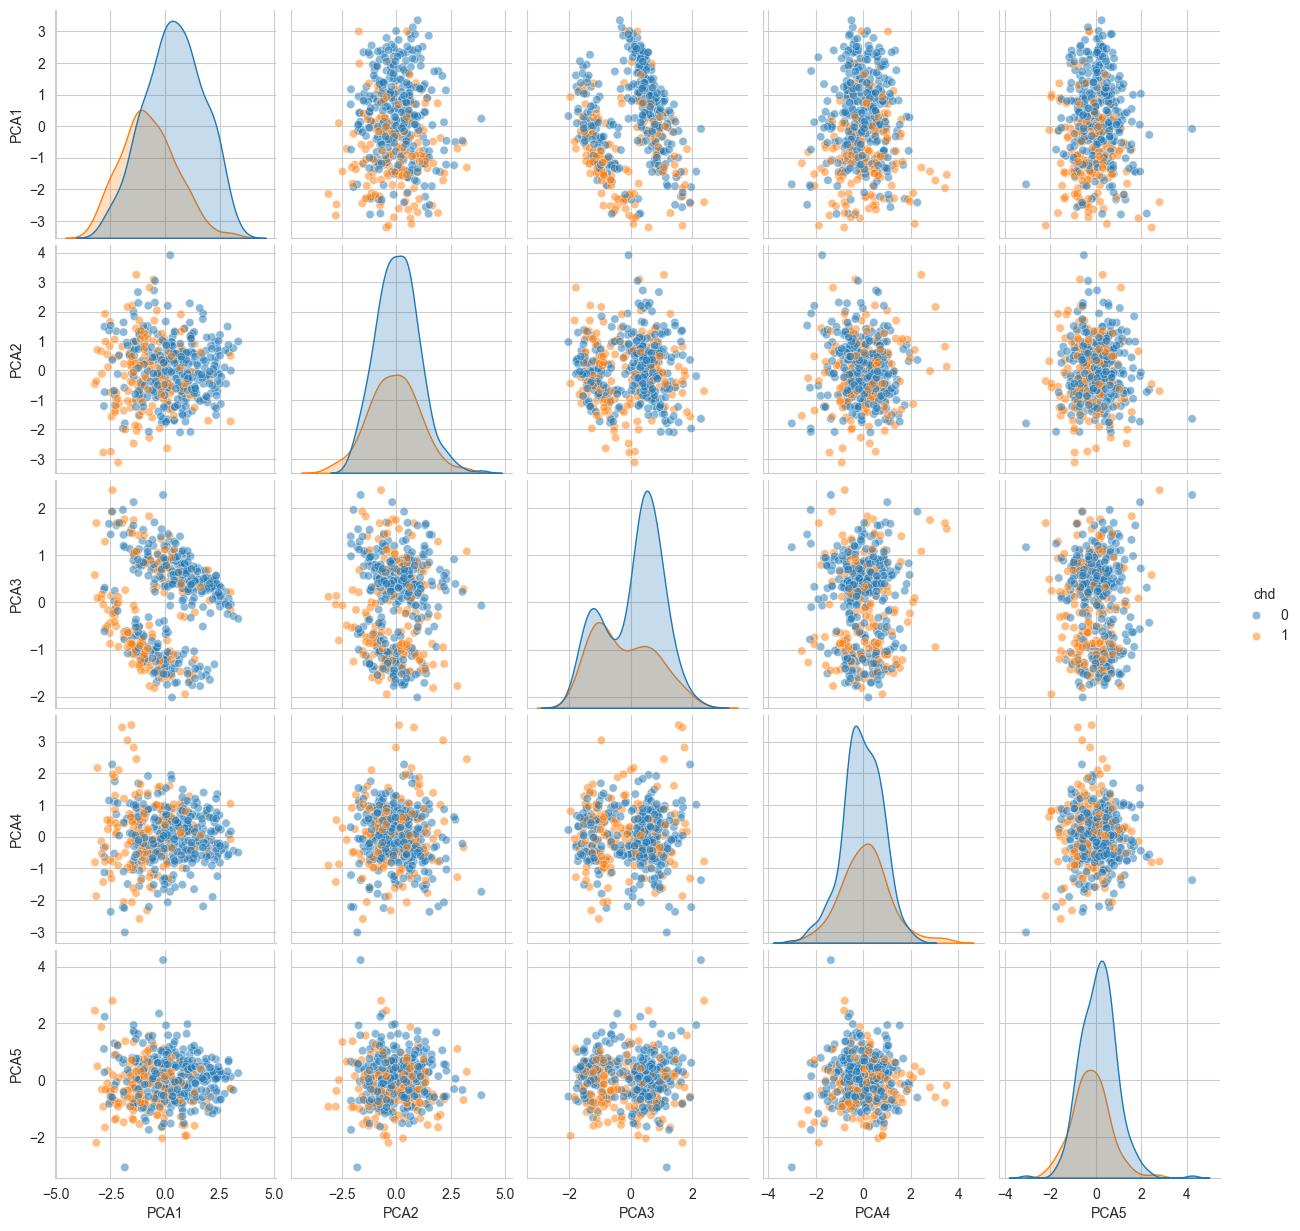

In [146]:

data_pca_df["chd"] = data_chd
# Create the pairplot colored by "CHD"
pairplot_fig = sns.pairplot(data_pca_df, hue="chd", plot_kws={"alpha": 0.5})

# Enhance the plot (optional)
# pairplot_fig.fig.suptitle("PCA Components Pairplot Colored by `chd`", y=1.02)  # Adjust title and its position
plt.savefig("figures/chd_target.png")
plt.show()